In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

from mosse import BoundingBox, Mosse

In [2]:
video = "/home/aurelien/Downloads/surfer.mp4"
tracker = Mosse()
cap = cv2.VideoCapture(video)


def annotate(frame: np.ndarray, bbox: BoundingBox):
    frame_copy = frame.copy()
    cv2.rectangle(
        frame_copy,
        (bbox.left, bbox.top),
        (bbox.right, bbox.bottom),
        color=(0, int(frame.max()), 0) if frame.ndim == 3 else int(frame.max()),
        thickness=2,
    )
    return frame_copy

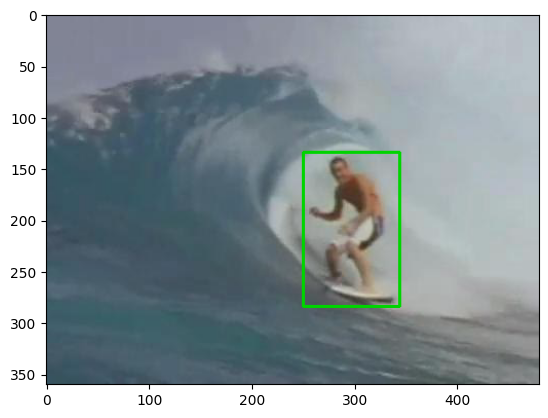

In [3]:
bbox = BoundingBox(297, 209, 95, 150)
_, frame = cap.read()
annotated_frame = annotate(frame, bbox)

plt.imshow(cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB))
plt.show()

BoundingBox(x=297, y=209, w=95, h=150, object_x=297, object_y=209, left=250, top=134, right=344, bottom=284)


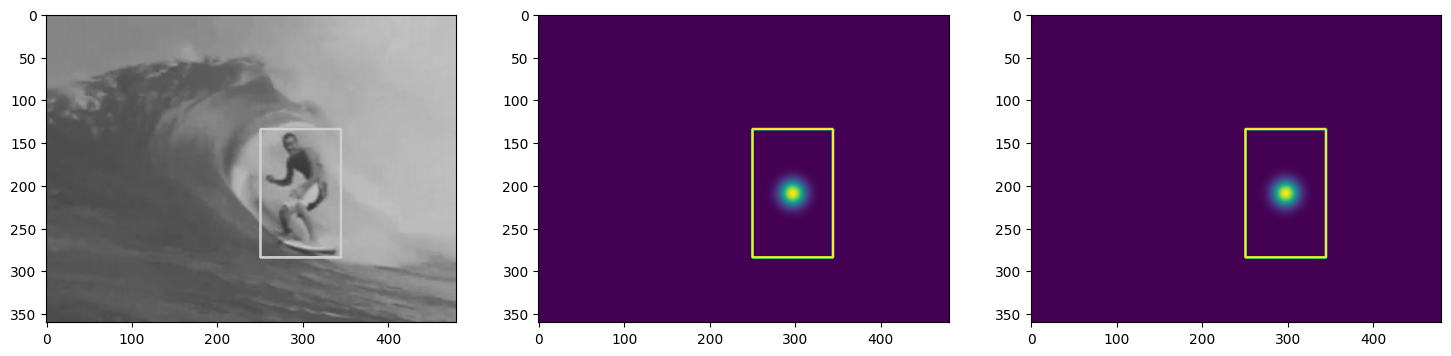

BoundingBox(x=297, y=209, w=95, h=150, object_x=297, object_y=209, left=250, top=134, right=344, bottom=284)


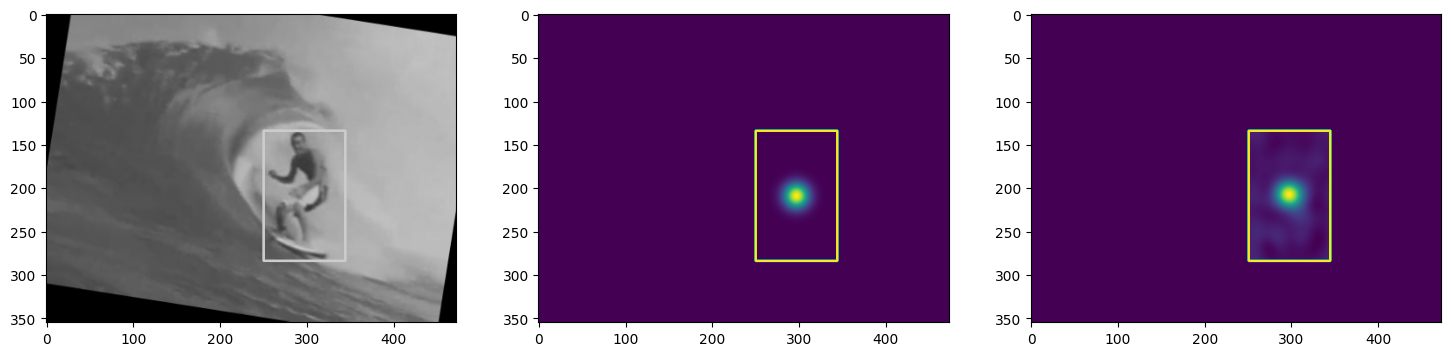

BoundingBox(x=297, y=209, w=95, h=150, object_x=297, object_y=209, left=250, top=134, right=344, bottom=284)


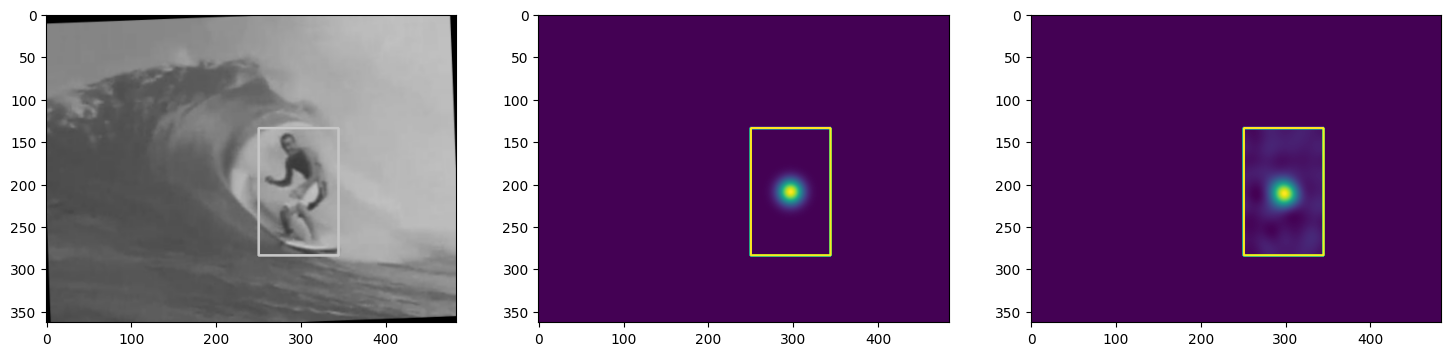

BoundingBox(x=297, y=209, w=95, h=150, object_x=297, object_y=209, left=250, top=134, right=344, bottom=284)


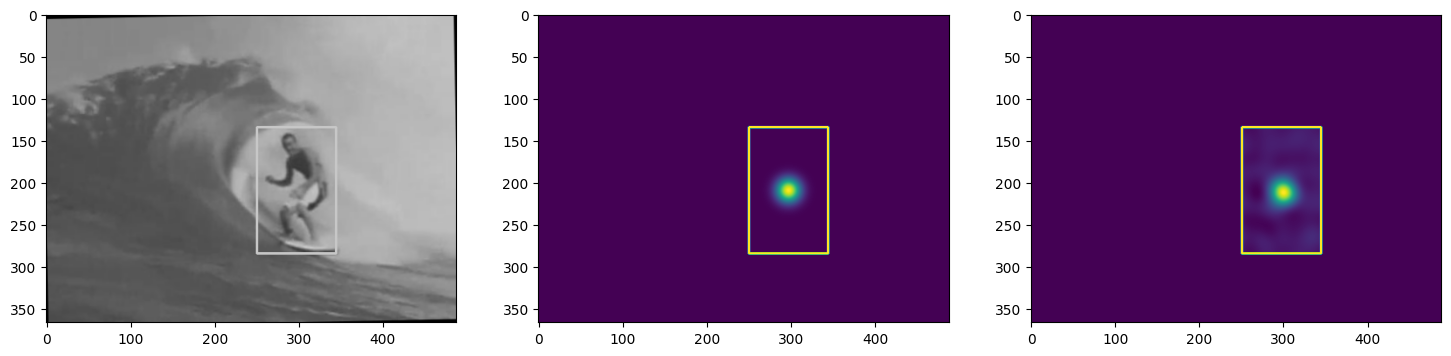

BoundingBox(x=297, y=209, w=95, h=150, object_x=297, object_y=209, left=250, top=134, right=344, bottom=284)


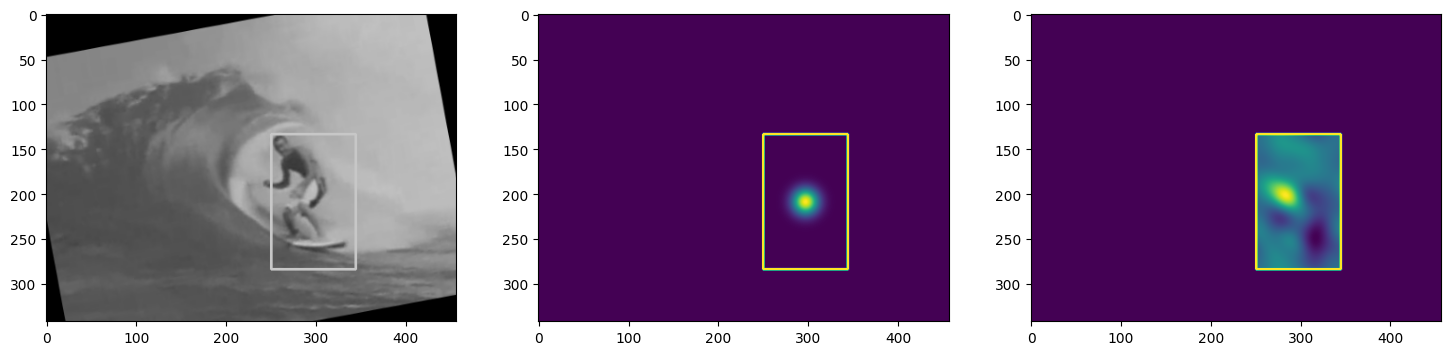

BoundingBox(x=297, y=209, w=95, h=150, object_x=297, object_y=209, left=250, top=134, right=344, bottom=284)


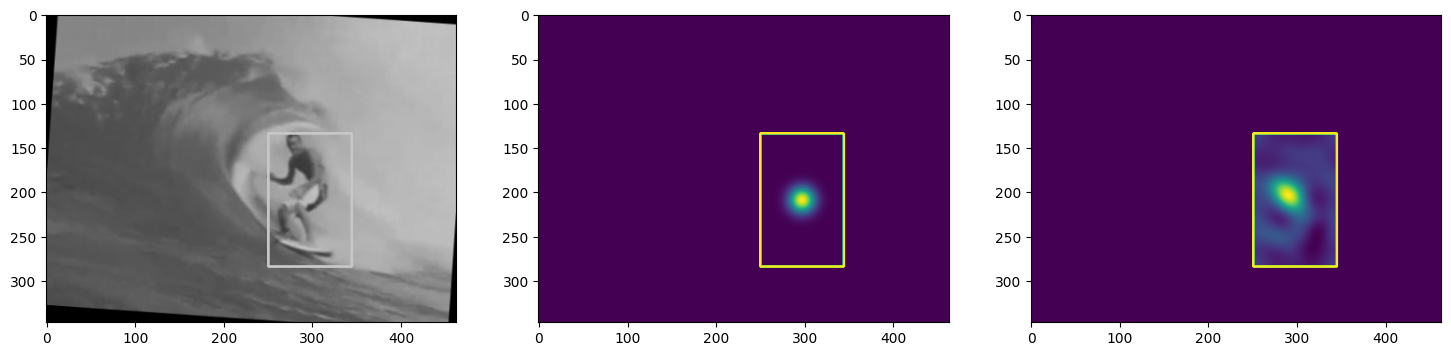

BoundingBox(x=297, y=209, w=95, h=150, object_x=297, object_y=209, left=250, top=134, right=344, bottom=284)


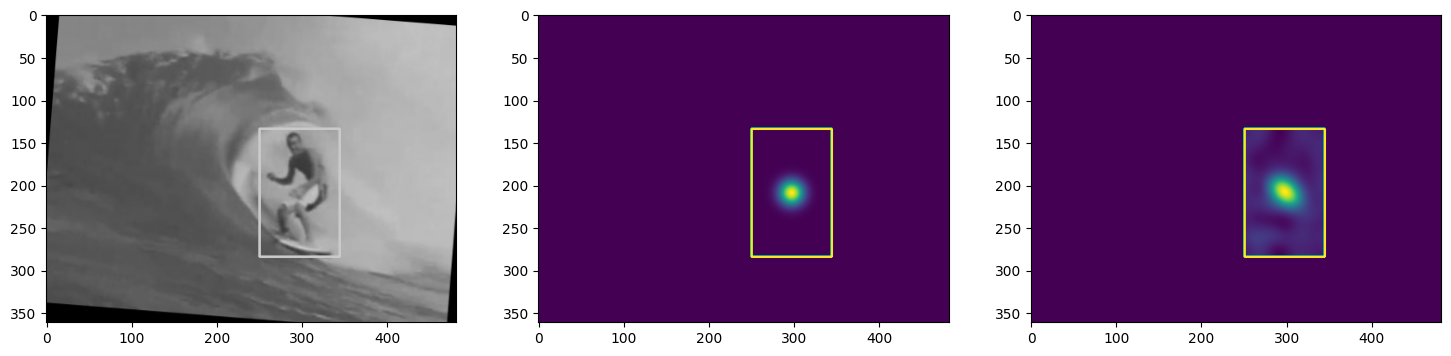

BoundingBox(x=297, y=209, w=95, h=150, object_x=297, object_y=209, left=250, top=134, right=344, bottom=284)


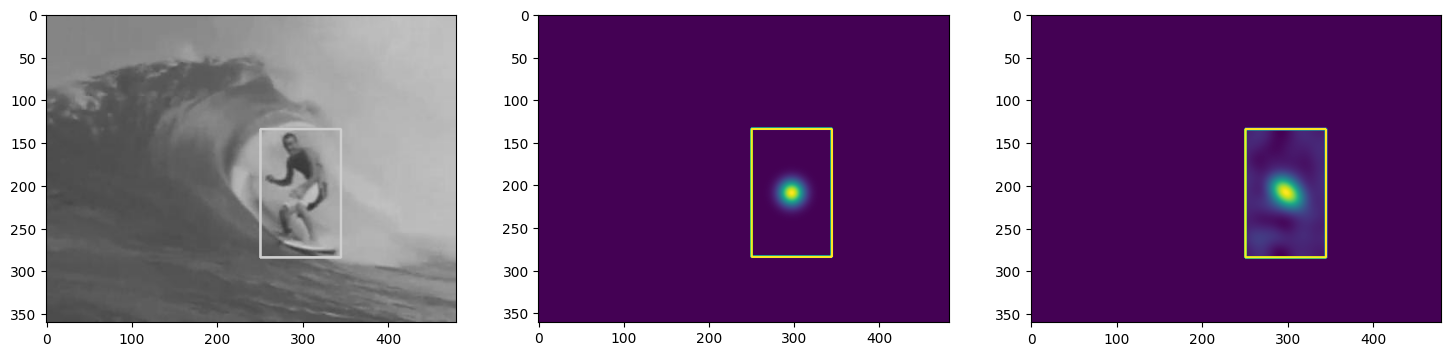

In [4]:
training_images = tracker.init(frame, bbox)
annotated_frame = annotate(frame, bbox)

for training_step in training_images[:4] + training_images[-4:]:
    frame = annotate(training_step.frame, bbox)
    response = annotate(training_step.target_response * 255, bbox)
    print(bbox)

    full_output = np.zeros_like(frame)
    full_output[bbox.top : bbox.bottom, bbox.left : bbox.right] = training_step.output
    full_output = annotate(full_output, bbox)

    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    ax[0].imshow(cv2.cvtColor(frame, cv2.COLOR_GRAY2RGB).astype("uint8"))
    ax[1].imshow(response)
    ax[2].imshow(full_output)
    plt.show()